# Reviews

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [2]:
reviews = pd.read_csv('reviews.csv')
reviews = pd.DataFrame.drop(reviews, columns=['id','date','reviewer_id','reviewer_name'])
reviews.shape, len(reviews[reviews['comments'].isna()==True])

((84849, 2), 18)

In [3]:
reviews=reviews.dropna()

In [4]:
def polarity(entry):
    if (type(entry) != str and math.isnan(entry)):
        return -2
    Rev_opinion = TextBlob(entry)
    return Rev_opinion.sentiment.polarity

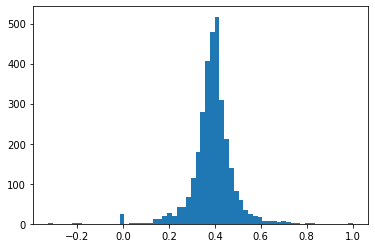

In [5]:
reviews['polarity']=reviews['comments'].apply(polarity)
reviews= reviews[reviews['polarity'] != -2]
polarity=reviews.groupby('listing_id')['polarity']. mean()
plt.hist(polarity, bins='scott')
plt.show()

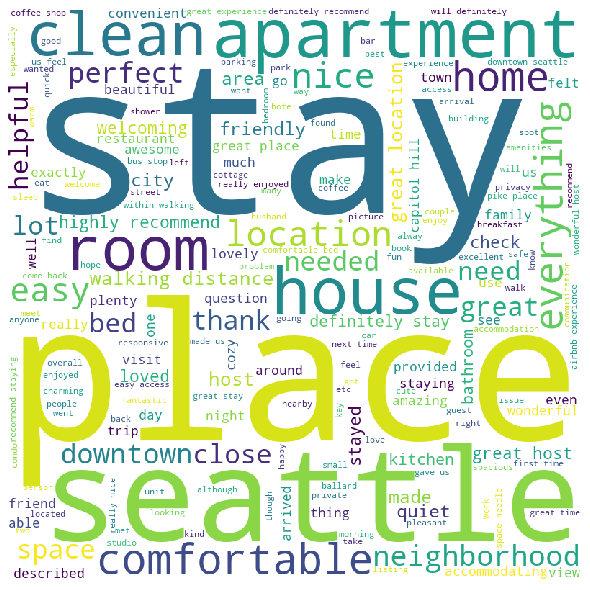

In [6]:
reviews = pd.read_csv('reviews.csv')
df = pd.DataFrame.drop(reviews, columns=['id','date','reviewer_id','reviewer_name'])

  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.comments: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Bibliografía

[Word cloud](https://www.geeksforgeeks.org/generating-word-cloud-python/)